# Task 7

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# $k$-means

Download the dataset `facebook.csv`

In [2]:
from google.colab import files
uploaded = files.upload()

Saving facebook.csv to facebook.csv


In [3]:
data = pd.read_csv('/content/facebook.csv')
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


## Clustering $k$-means

### Exercise 1
Remove from the dataset the first three variables

In [4]:
# All these ways are valid
data = data.iloc[:, 3:]
# data = data.drop(columns=['status_id', 'status_type', 'status_published'])
# data.drop(columns=['status_id', 'status_type', 'status_published'], inplace=True)
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


### Exercise 2

Find out the number of clusters in this dataset.

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

First, we have to standarize our data

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit(data).transform(data)

**The elbow method**

In [7]:
wcss_list=[]

for k in range(1,20):
  kmeans_model=KMeans(n_clusters=k,random_state=1)
  kmeans_model.fit(data_scaled)
  wcss_list.append(kmeans_model.inertia_)

In [8]:
wcss_list

[63450.00000000021,
 48802.38255548585,
 38372.99772386941,
 32469.791362309636,
 29203.23757478824,
 27068.78987573232,
 23891.568071743815,
 19270.024281433492,
 17594.115191533405,
 16804.652582694725,
 15664.875505795766,
 14801.848982022126,
 14097.364579758236,
 13499.644269024931,
 12752.170426914823,
 12288.59350884706,
 11698.745767140479,
 11313.077676531488,
 10980.580747996128]

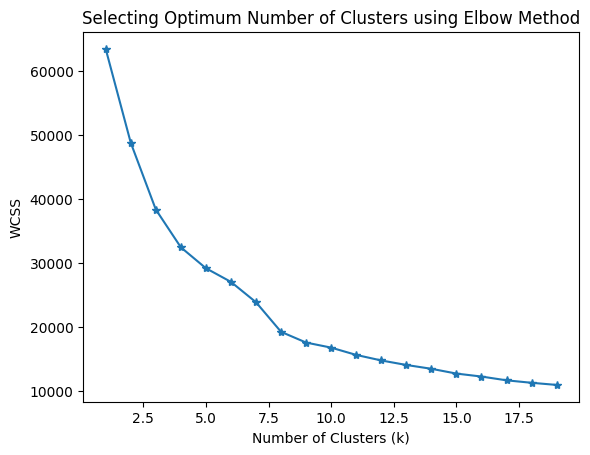

In [9]:
# Plot the inertia (WCSS) and number of clusters
plt.plot(range(1, 20), wcss_list,  marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

**The silhouette method**

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
score_list = []

for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=1)
  km.fit(data)
  pred = km.predict(data)
  score_list.append(silhouette_score(data, pred))

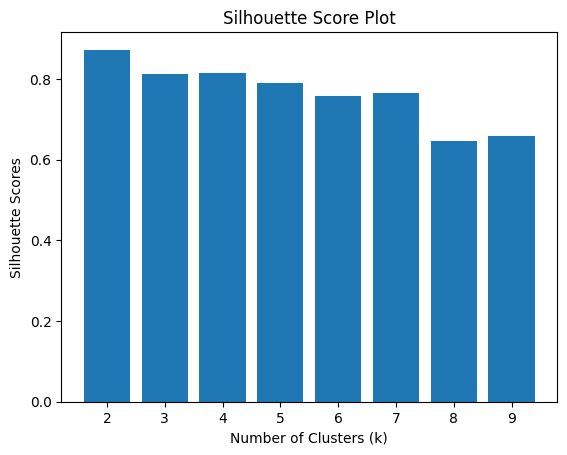

In [12]:
# Plot the Silhouette score and number of cluster
plt.bar(range(2, 10), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.show()

So we conclude that the best option if `num_clusters = 2`

### Exercise 3

Clustering the data using the $k$-means method

In [13]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(data_scaled)
pred = km.predict(data_scaled)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
km.inertia_

48802.38255548585

### Exercise 4

Put the observations from the largest cluster in the dataframe and describe this largest cluster

In [15]:
# data['cluster'] = pred
data.loc[:, 'cluster'] = pred # it's the same
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,0
7047,2,0,0,1,1,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,0


In [16]:
summary=data.groupby('cluster').mean()
summary['count']=data['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
summary

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,count
cluster,,,,,,,,,,
0,128.906857,86.314104,18.513295,121.590266,6.318924,0.529000,0.299176,0.123153,0.044317,6431
1,1281.625202,1658.520194,263.489499,1185.956381,79.321486,9.189015,4.823910,1.495961,0.828756,619


As we see, the largest cluster is Cluster 0

We see that in this cluster `num_likes`, `num_comments` and `num_reactions` are all much lower than in the other one, so we can conclude that people in this group are much less popular.

In [20]:
data[data.cluster==0]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,0
7047,2,0,0,1,1,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,0


In [17]:
largest_cluster = data[data.cluster==0]
largest_cluster.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.000000,6431.0
mean,128.906857,86.314104,18.513295,121.590266,6.318924,0.529000,0.299176,0.123153,0.044317,0.0
std,204.728550,277.707486,56.241496,201.604620,17.112222,1.505012,1.365219,0.835308,0.311613,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,46.000000,3.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,165.000000,15.000000,2.000000,140.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1428.000000,3863.000000,496.000000,1428.000000,147.000000,28.000000,40.000000,21.000000,8.000000,0.0


### Exercise 5

Calculate the value of the average silhouette for the whole dataset in this clustering  

In [21]:
# This function returns the mean silhouette score for all data points in the dataset
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, pred, metric="euclidean")

0.7733512883941429

## Hierarchical clustering

### Exercise 1

Produce a dendogram of the dataset using Euclidean distance and complete

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram

By default, the linkage function from `scipy.cluster.hierarchy` uses Euclidean distance as the distance metric if no `metric` parameter is explicitly provided

In [23]:
# Perform hierarchical clustering using complete linkage and Euclidean distance
linkage_matrix=linkage(data_scaled, method='complete') # metric='euclidean' by default
linkage_matrix

array([[6.20000000e+03, 6.25100000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.17600000e+03, 6.22700000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.19000000e+03, 6.24100000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.40920000e+04, 1.40950000e+04, 4.58277594e+01, 7.04000000e+03],
       [1.40820000e+04, 1.40960000e+04, 5.36408242e+01, 7.04300000e+03],
       [1.40940000e+04, 1.40970000e+04, 5.71795039e+01, 7.05000000e+03]])

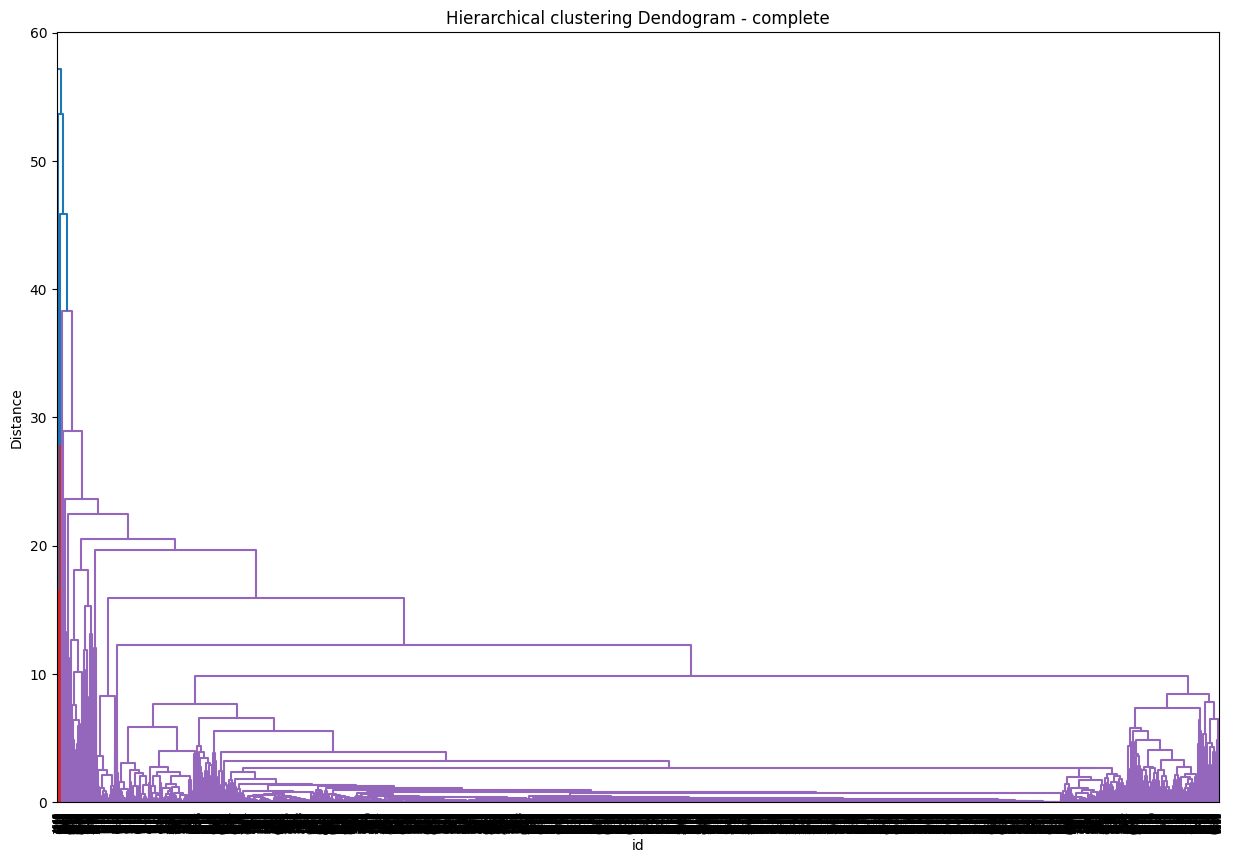

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=data.index.values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical clustering Dendogram - complete")
plt.xlabel('id')
plt.ylabel('Distance')
plt.show()

### Exercise 2

Using the tree above, split the dataset into 4 clusters

In [24]:
from scipy.cluster.hierarchy import fcluster

# Split into 4 clusters
cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Add cluster labels to the original dataset
data['cluster'] = cluster_labels
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,4
1,150,0,0,150,0,0,0,0,0,4
2,227,236,57,204,21,1,1,0,0,4
3,111,0,0,111,0,0,0,0,0,4
4,213,0,0,204,9,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,4
7046,16,0,0,14,1,0,1,0,0,4
7047,2,0,0,1,1,0,0,0,0,4
7048,351,12,22,349,2,0,0,0,0,4


In [25]:
summary=data.groupby('cluster').mean()
summary['count']=data['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
summary

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,count
cluster,,,,,,,,,,
4,225.122650,219.486040,37.317949,211.708262,11.648718,0.854701,0.574359,0.237179,0.096724,7020
3,1564.900000,1561.950000,831.000000,1110.350000,302.250000,138.900000,10.050000,1.400000,1.950000,20
1,1421.428571,1368.142857,508.142857,1003.285714,273.857143,43.285714,96.142857,3.285714,1.571429,7
2,239.000000,34.000000,3.333333,210.666667,0.333333,3.000000,1.333333,0.666667,23.000000,3


### Exercide 3

Show observations from the smallest cluster

In [26]:
data[data.cluster==2]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
3313,215,44,0,176,1,3,4,0,31,2
6204,251,29,5,228,0,3,0,1,19,2
6255,251,29,5,228,0,3,0,1,19,2


The smallest cluster is now Cluster 2. We observe it's not vety popular (as opposed to Clusters 3 and 1) as we see in features like `num_shares`, `num_comments` or `num_likes`. However it's pretty similar to Cluster 4 (which is the largest cluster) in this aspect. The main difference among those two would be the `num_angries`, where CLuster 2 has many more.

In [ ]:
smallest_cluster = data[data.cluster==2]
smallest_cluster.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,3.00000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0
mean,239.00000,34.000000,3.333333,210.666667,0.333333,3.0,1.333333,0.666667,23.000000,2.0
std,20.78461,8.660254,2.886751,30.022214,0.577350,0.0,2.309401,0.577350,6.928203,0.0
min,215.00000,29.000000,0.000000,176.000000,0.000000,3.0,0.000000,0.000000,19.000000,2.0
25%,233.00000,29.000000,2.500000,202.000000,0.000000,3.0,0.000000,0.500000,19.000000,2.0
50%,251.00000,29.000000,5.000000,228.000000,0.000000,3.0,0.000000,1.000000,19.000000,2.0
75%,251.00000,36.500000,5.000000,228.000000,0.500000,3.0,2.000000,1.000000,25.000000,2.0
max,251.00000,44.000000,5.000000,228.000000,1.000000,3.0,4.000000,1.000000,31.000000,2.0


# kNN

Download the dataset `water.csv`

In [27]:
from google.colab import files
uploaded = files.upload()

Saving water.csv to water.csv


In [28]:
data = pd.read_csv('/content/water.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,7.424764,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,3.716080,129.422921,18630.057858,6.635246,332.759842,592.885359,15.180013,56.329076,4.500656,0
3,8.099124,224.236259,19909.541732,9.275884,318.740022,418.606213,16.868637,66.420093,3.055934,0
4,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
5,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3272,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,7.808856,193.553212,17329.802160,8.061362,340.356991,392.449580,19.903225,65.094659,2.798243,1
3274,9.419510,175.762646,33155.578218,7.350233,323.933136,432.044783,11.039070,69.845400,3.298875,1
3275,5.126763,230.603758,11983.869376,6.303357,341.411948,402.883113,11.168946,77.488213,4.708658,1


## Exercise 1

Apply the $k$NN algorithm (for any value of $k$)

The target value is Potability


In [29]:
data.Potability.value_counts(normalize=True)

,proportion
Potability,
0,0.60989
1,0.39011


<Axes: xlabel='Potability', ylabel='count'>

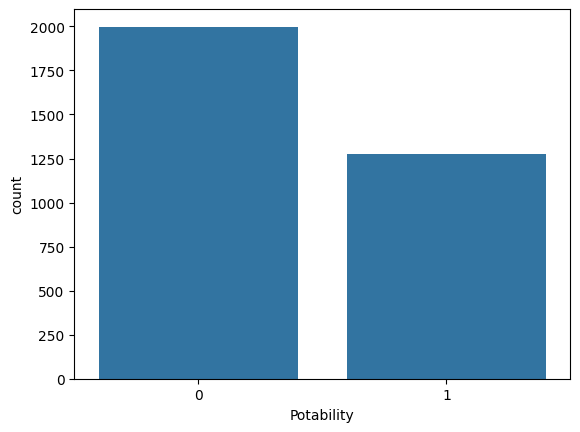

In [31]:
sns.countplot(x='Potability', data=data)

Let's separate the features

In [30]:
X = data.drop(columns=['Potability'])
y = data['Potability']

We define the train and test sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Now, we have to standarize our data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)  # k=20 (for example)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [36]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.681586978636826

## Exercise 2

Determine the best value of $k$. Build a knn model for the optimal $k$

In [ ]:
error1= []
error2= []

for k in range(1,21,2):
  knn=KNeighborsClassifier(k)
  knn.fit(X_train,y_train) # the model is trained on the training set
  y_pred1=knn.predict(X_train)
  error1.append(np.mean(y_train!=y_pred1)) # error rate is calculated as the mean of misclassified examples
  y_pred2=knn.predict(X_test)
  error2.append(np.mean(y_test!=y_pred2))

We should look for the $k$ where the test error (`error2`) is minimized.

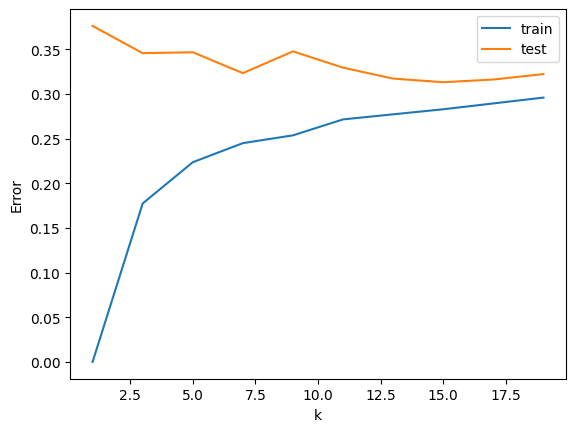

In [ ]:
plt.plot(range(1,21,2), error1, label="train")
plt.plot(range(1,21,2), error2, label="test") # these are more important
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()

In [ ]:
accuracy_rate = []

for k in range(1,20) :
  c1=KNeighborsClassifier(k)
  c1.fit(X_train,y_train)
  y_pr=c1.predict(X_test)
  score=accuracy_score(y_test,y_pr)
  accuracy_rate.append(score)

We should look for the value of $k$ where accuracy is highest on the test set.

In [ ]:
max_acc = max(accuracy_rate)
max_index = accuracy_rate.index(max_acc)
print(max_acc)
print(max_index+1)

0.688708036622584
14


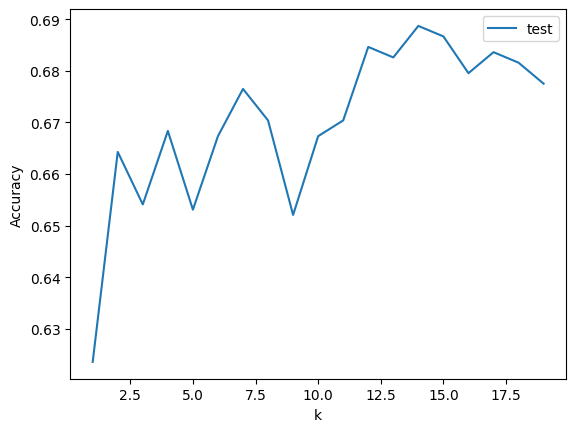

In [ ]:
plt.plot(range(1,20), accuracy_rate, label="test")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

We conclude that the best value is $k=14$ (`n_clusters=14`)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=14)  # k=14
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
accuracy_score(y_test, y_pred)

0.688708036622584

## Exercise 3

Provide the confusion matrix for the given classifier

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm) # to see the TP, TN, FP, FN

[[568  49]
 [257 109]]


<Axes: >

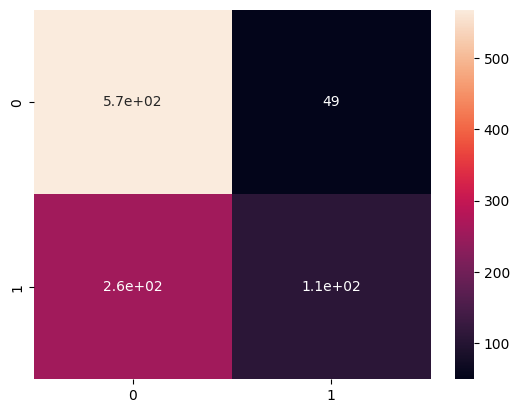

In [ ]:
sns.heatmap(cm, annot=True)